In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import (
    KNeighborsClassifier,
    DistanceMetric
)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel (r'China.xlsx', header = None, index_col=False)

In [3]:
data = data.to_numpy()

In [4]:
#Pure number
case = []
for datum in data:
    case.append(datum[1:])
case = np.array(case)

In [5]:
#province
province = []
for datum in data:
    province.append(datum[0])
province = np.array(province)
#province = province[:,None]
province.size

34

In [6]:
#normalize case
sum_of_rows = case.sum(axis = 1)
normalized_case = case / sum_of_rows[:,np.newaxis]
normalized_case = normalized_case.astype(float)

In [7]:
normalized_case[0]

array([0.00313554, 0.00397762, 0.00489948, 0.00592742, 0.00731086,
       0.00862022, 0.00969287, 0.01093823, 0.01187938, 0.01298885,
       0.01390808, 0.0146261 , 0.01528714, 0.02278035, 0.02384906,
       0.02465694, 0.02550428, 0.02629639, 0.02703852, 0.0271915 ,
       0.02746811, 0.02781528, 0.02809144, 0.02818043, 0.02839917,
       0.02857495, 0.02875423, 0.02889363, 0.02907905, 0.02932892,
       0.02941483, 0.02946481, 0.02951522, 0.02957396, 0.02962919,
       0.02966163, 0.0296796 , 0.02969538, 0.02970283, 0.02970853,
       0.02971204, 0.02971423, 0.02971598, 0.02971774])

In [11]:
#Train KNN
N_NEIGHBORS = 10
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='minkowski')
knn.fit(normalized_case, province)

KNeighborsClassifier(n_neighbors=10)

In [12]:
#check how many
mylist= {}
_dict = ["minkowski","euclidean","manhattan"]
for i in range(province.size):
    pro = province[i]
    mycase = normalized_case[i]
    neigh = []
    for dick in _dict:
        knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric= dick)
        knn.fit(normalized_case, province)
        neigh.append(knn.predict([mycase])[0])
    mylist[pro] = neigh

In [13]:
mylist

{'Hubei': ['Guizhou', 'Guizhou', 'Guizhou'],
 'Guangdong': ['Chongqing', 'Chongqing', 'Chongqing'],
 'Henan': ['Anhui', 'Anhui', 'Anhui'],
 'Zhejiang': ['Chongqing', 'Chongqing', 'Chongqing'],
 'Hunan': ['Chongqing', 'Chongqing', 'Chongqing'],
 'Anhui': ['Anhui', 'Anhui', 'Anhui'],
 'Jiangxi': ['Anhui', 'Anhui', 'Anhui'],
 'Shandong': ['Beijing', 'Beijing', 'Guizhou'],
 'Jiangsu': ['Anhui', 'Anhui', 'Anhui'],
 'Chongqing': ['Beijing', 'Beijing', 'Beijing'],
 'Sichuan': ['Anhui', 'Anhui', 'Anhui'],
 'Heilongjiang': ['Guizhou', 'Guizhou', 'Guizhou'],
 'Beijing': ['Beijing', 'Beijing', 'Beijing'],
 'Shanghai': ['Chongqing', 'Chongqing', 'Chongqing'],
 'Hebei': ['Guizhou', 'Guizhou', 'Guizhou'],
 'Fujian': ['Chongqing', 'Chongqing', 'Chongqing'],
 'Guangxi': ['Beijing', 'Beijing', 'Anhui'],
 'Shaanxi': ['Chongqing', 'Chongqing', 'Chongqing'],
 'Yunnan': ['Chongqing', 'Chongqing', 'Chongqing'],
 'Hainan': ['Anhui', 'Anhui', 'Anhui'],
 'Guizhou': ['Anhui', 'Anhui', 'Guizhou'],
 'Tianjin': ['

Text(0, 0.5, 'Cumulative Percentage')

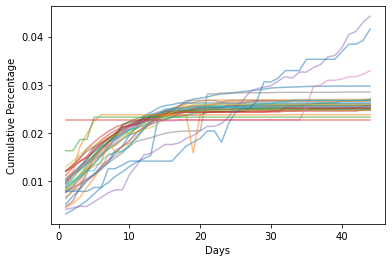

In [19]:
x = np.linspace(1,44,44)
for y in normalized_case:
    #if(y.ptp()>0.01): 
    plt.plot(x,y, alpha = 0.5)
plt.xlabel("Days")
plt.ylabel("Cumulative Percentage")

In [20]:
#Doing linear regression
from sklearn.linear_model import LinearRegression
LM = LinearRegression()

In [21]:
total = case.sum(axis = 0).astype(float)

In [22]:
date = x.reshape(-1,1)

In [23]:
LM.fit(date,total)

LinearRegression()

Text(0, 0.5, 'cumulative cases')

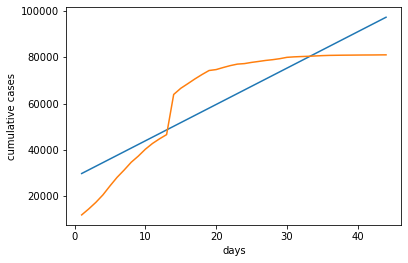

In [25]:
plt.plot(x,LM.predict(date))
plt.plot(x,total)
plt.xlabel("days")
plt.ylabel("cumulative cases")

In [26]:
#doing logistic regression
from sklearn.linear_model import LogisticRegression

In [27]:
LoR = LogisticRegression()

In [28]:
LoR.fit(date,total)

C:\Users\qq104\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Text(0, 0.5, 'cumulative cases')

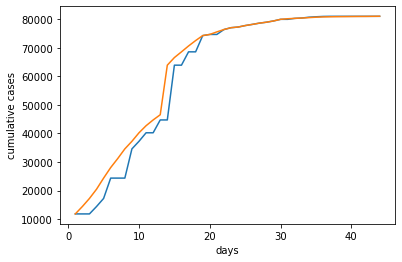

In [29]:
plt.plot(x,LoR.predict(date))
plt.plot(x,total)
plt.xlabel("days")
plt.ylabel("cumulative cases")

In [31]:
LoR.predict(np.array([[45]]))

array([81021.])

In [32]:
newdata = pd.read_excel (r'China.xlsx', 'Sheet2',header = None, index_col=False)

In [33]:
newdata = newdata.to_numpy()[0][1:]

In [34]:
newdata.astype(float).size

114

In [35]:
newdate = np.linspace(1,114,114).reshape(-1,1)

Text(0, 0.5, 'cumulative cases')

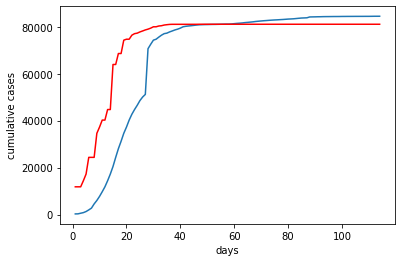

In [37]:
plt.plot(newdate,newdata)
plt.plot(newdate,LoR.predict(newdate),c="red")
plt.xlabel("days")
plt.ylabel("cumulative cases")